In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
import seaborn as  sn
import warnings
warnings.filterwarnings("ignore")
np.random.seed(42)

In [80]:
df=pd.read_csv('winequality-white.csv',sep=';')
#https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.names

In [81]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [82]:
df['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

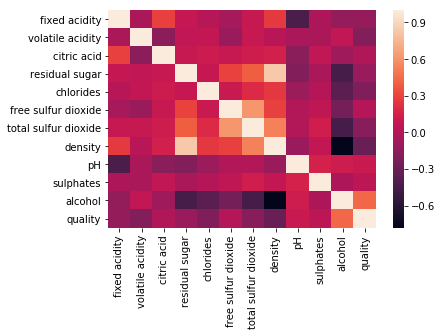

In [83]:

sn.heatmap(df.corr())

In [86]:
df.shape

(3189, 12)

In [85]:
df.drop_duplicates(keep=False, inplace=True)

In [87]:
X=df.drop(columns='quality')
y=df['quality']

In [88]:
train, test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [89]:
lr = LogisticRegression()
lr.fit(train, y_train)
y_pred = lr.predict(test)
print('Accuracy score baseline:', accuracy_score(y_test, y_pred))

Accuracy score baseline: 0.5088819226750261


In [90]:
dt = DecisionTreeClassifier()
dt.fit(train, y_train)
y_pred = dt.predict(test)
print(accuracy_score(y_test, y_pred))

0.4231974921630094


In [91]:
def fit_predict(train, test, y_train, y_test, max_depth, 
                criterion = 'entropy', max_features = 1, min_samples_split = 4):
    dt = DecisionTreeClassifier(criterion = criterion, max_depth=max_depth, 
                                random_state=42, max_features=max_features,
                               min_samples_split=min_samples_split)
    dt.fit(train, y_train)
    y_pred = dt.predict(test)
    print(accuracy_score(y_test, y_pred))

In [22]:
dt = DecisionTreeClassifier(max_depth=22,max_features=0.2,min_samples_split=2)
dt.fit(train, y_train)
y_pred = dt.predict(test)
print(accuracy_score(y_test, y_pred))

0.8085106382978723


In [40]:
#MAx Depth

In [44]:
for i in range(1,25):
    print('Accuracy score using max_depth =', i, end = ': ')
    fit_predict(train, test, y_train, y_test, i)

Accuracy score using max_depth = 1: 0.46938775510204084
Accuracy score using max_depth = 2: 0.4714285714285714
Accuracy score using max_depth = 3: 0.4741496598639456
Accuracy score using max_depth = 4: 0.47891156462585033
Accuracy score using max_depth = 5: 0.47687074829931975
Accuracy score using max_depth = 6: 0.45374149659863944
Accuracy score using max_depth = 7: 0.5095238095238095
Accuracy score using max_depth = 8: 0.5027210884353741
Accuracy score using max_depth = 9: 0.4965986394557823
Accuracy score using max_depth = 10: 0.5319727891156463
Accuracy score using max_depth = 11: 0.5115646258503401
Accuracy score using max_depth = 12: 0.5571428571428572
Accuracy score using max_depth = 13: 0.5210884353741496
Accuracy score using max_depth = 14: 0.5387755102040817
Accuracy score using max_depth = 15: 0.5517006802721088
Accuracy score using max_depth = 16: 0.5374149659863946
Accuracy score using max_depth = 17: 0.5333333333333333
Accuracy score using max_depth = 18: 0.55782312925170

In [ ]:
MAXFetature  -- percentage of features 

In [45]:
for i in np.arange(0.1, 1.0, 0.1):
    print('Accuracy score using max features =', i, end = ': ')
    fit_predict(train, test, y_train, y_test, max_depth = 25, max_features=i)

Accuracy score using max features = 0.1: 0.5448979591836735
Accuracy score using max features = 0.2: 0.5598639455782313
Accuracy score using max features = 0.30000000000000004: 0.5578231292517006
Accuracy score using max features = 0.4: 0.5761904761904761
Accuracy score using max features = 0.5: 0.5816326530612245
Accuracy score using max features = 0.6: 0.5748299319727891
Accuracy score using max features = 0.7000000000000001: 0.5775510204081633
Accuracy score using max features = 0.8: 0.5986394557823129
Accuracy score using max features = 0.9: 0.5816326530612245


In [ ]:
#MinSampleSplit --  no of records to require to split the node Example if minmum of 2 sample then only split happen

In [46]:
for i in range(2, 10):
    print('Accuracy score using min samples split =', i, end = ': ')
    fit_predict(train, test, y_train, y_test, 25, max_features=0.8, min_samples_split=i)

Accuracy score using min samples split = 2: 0.5965986394557823
Accuracy score using min samples split = 3: 0.5741496598639456
Accuracy score using min samples split = 4: 0.5986394557823129
Accuracy score using min samples split = 5: 0.5843537414965987
Accuracy score using min samples split = 6: 0.5897959183673469
Accuracy score using min samples split = 7: 0.5666666666666667
Accuracy score using min samples split = 8: 0.5510204081632653
Accuracy score using min samples split = 9: 0.5503401360544218


In [ ]:
#Critertion 

In [47]:
for i in ['gini', 'entropy']:
    print('Accuracy score using criterion =', i, end = ': ')
    fit_predict(train, test, y_train, y_test, 25, 
                max_features=0.8, min_samples_split=4, criterion = i)

Accuracy score using criterion = gini: 0.5673469387755102
Accuracy score using criterion = entropy: 0.5986394557823129


In [49]:
dt = DecisionTreeClassifier(max_depth=20,criterion ='entropy',max_features=0.8,min_samples_split=4)
dt.fit(train, y_train)
y_pred = dt.predict(test)
print(accuracy_score(y_test, y_pred))

0.5877551020408164


In [92]:
def fit_predict(train, test, y_train, y_test, max_depth, 
                criterion = 'entropy', max_features = 1, min_samples_split = 4,n_estimators=10):
    dt = RandomForestClassifier(n_estimators=n_estimators, criterion = criterion, max_depth=max_depth, 
                                random_state=42, max_features=max_features,
                               min_samples_split=min_samples_split)
    dt.fit(train, y_train)
    y_pred = dt.predict(test)
    print(accuracy_score(y_test, y_pred))

In [93]:
#N_estimator ( no.of Tree)

In [94]:
for i in range(10,100,10):
    print('Accuracy score using No.of Tree =', i, end = ': ')
    fit_predict(train, test, y_train, y_test, 26 
                ,n_estimators=i)
    

Accuracy score using No.of Tree = 10: 0.4754440961337513
Accuracy score using No.of Tree = 20: 0.509926854754441
Accuracy score using No.of Tree = 30: 0.522466039707419
Accuracy score using No.of Tree = 40: 0.5266457680250783
Accuracy score using No.of Tree = 50: 0.5329153605015674
Accuracy score using No.of Tree = 60: 0.542319749216301
Accuracy score using No.of Tree = 70: 0.5412748171368861
Accuracy score using No.of Tree = 80: 0.5329153605015674
Accuracy score using No.of Tree = 90: 0.5391849529780565


In [63]:
for i in range(1,26):
    print('Accuracy score using max_depth =', i, end = ': ')
    fit_predict(train, test, y_train, y_test, i,n_estimators=90)

Accuracy score using max_depth = 1: 0.46938775510204084
Accuracy score using max_depth = 2: 0.4782312925170068
Accuracy score using max_depth = 3: 0.5176870748299319
Accuracy score using max_depth = 4: 0.5251700680272109
Accuracy score using max_depth = 5: 0.5394557823129251
Accuracy score using max_depth = 6: 0.54421768707483
Accuracy score using max_depth = 7: 0.5659863945578232
Accuracy score using max_depth = 8: 0.5816326530612245
Accuracy score using max_depth = 9: 0.5891156462585034
Accuracy score using max_depth = 10: 0.6163265306122448
Accuracy score using max_depth = 11: 0.6258503401360545
Accuracy score using max_depth = 12: 0.638095238095238
Accuracy score using max_depth = 13: 0.6625850340136055
Accuracy score using max_depth = 14: 0.6591836734693878
Accuracy score using max_depth = 15: 0.6680272108843538
Accuracy score using max_depth = 16: 0.6714285714285714
Accuracy score using max_depth = 17: 0.6666666666666666
Accuracy score using max_depth = 18: 0.6714285714285714
Acc

In [64]:
for i in np.arange(0.1, 1.0, 0.1):
    print('Accuracy score using max features =', i, end = ': ')
    fit_predict(train, test, y_train, y_test, max_depth = 26, max_features=i,n_estimators=90)

Accuracy score using max features = 0.1: 0.682312925170068
Accuracy score using max features = 0.2: 0.6748299319727891
Accuracy score using max features = 0.30000000000000004: 0.6748299319727891
Accuracy score using max features = 0.4: 0.6768707482993197
Accuracy score using max features = 0.5: 0.6761904761904762
Accuracy score using max features = 0.6: 0.6714285714285714
Accuracy score using max features = 0.7000000000000001: 0.673469387755102
Accuracy score using max features = 0.8: 0.680952380952381
Accuracy score using max features = 0.9: 0.6795918367346939


In [65]:
for i in range(2, 10):
    print('Accuracy score using min samples split =', i, end = ': ')
    fit_predict(train, test, y_train, y_test, 26, max_features=0.1, min_samples_split=i,n_estimators=90)

Accuracy score using min samples split = 2: 0.6795918367346939
Accuracy score using min samples split = 3: 0.6700680272108843
Accuracy score using min samples split = 4: 0.682312925170068
Accuracy score using min samples split = 5: 0.6700680272108843
Accuracy score using min samples split = 6: 0.6741496598639456
Accuracy score using min samples split = 7: 0.6551020408163265
Accuracy score using min samples split = 8: 0.6489795918367347
Accuracy score using min samples split = 9: 0.6503401360544218


In [67]:
for i in ['gini', 'entropy']:
    print('Accuracy score using criterion =', i, end = ': ')
    fit_predict(train, test, y_train, y_test, 26, 
                max_features=0.2, min_samples_split=4, criterion = i,n_estimators=90)

Accuracy score using criterion = gini: 0.680952380952381
Accuracy score using criterion = entropy: 0.6748299319727891


In [68]:
    fit_predict(train, test, y_train, y_test, 26, 
                max_features=0.1, min_samples_split=4, criterion = i,n_estimators=90)

0.682312925170068
